Debit: Create atleast 5 bucket: You may select any of these - Online food, Online Shopping, Broker (Zerodha transactions),  Subscriptions & Recharges, Utility, online credit aggregator, fund transfers, cash withdrawal, and Misc. 

Credit: Create another bucket for credits

#*SMS Categorization*#

In [5]:
import pandas as pd
import numpy as np
import regex as re


In [6]:
!pip install xlrd==1.2.0
!pip install -q tf-models-official==2.7.0



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 238 kB 53.6 MB/s 
     |████████████████████████████████| 1.3 MB 30.9 MB/s 
     |████████████████████████████████| 1.1 MB 49.3 MB/s 
     |████████████████████████████████| 43 kB 1.2 MB/s 
     |████████████████████████████████| 116 kB 46.8 MB/s 
     |████████████████████████████████| 352 kB 46.9 MB/s 
     |████████████████████████████████| 99 kB 6.5 MB/s 


In [7]:
data = pd.read_excel(r'input_data.xls')
data = data[5:230]

In [8]:
data.columns

Index(['Unnamed: 0',
       'Debit: Create atleast 5 bucket: You may select any of these - Online food, Online Shopping, Broker (Zerodha transactions),  Subscriptions & Recharges, Utility, online credit aggregator, fund transfers, cash withdrawal, and Misc. ',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

In [9]:
data.rename(columns={'Unnamed: 0': 'Date of Transaction',
                     'Debit: Create atleast 5 bucket: You may select any of these - Online food, Online Shopping, Broker (Zerodha transactions),  Subscriptions & Recharges, Utility, online credit aggregator, fund transfers, cash withdrawal, and Misc. ': 'Transaction Summary',
                     'Unnamed: 2': 'Date2',
                     'Unnamed: 3': 'Debit Amount',
                     'Unnamed: 4': 'Credit Amount'}, inplace=True)

In [10]:
data.drop('Date2', axis = 1)
data.reset_index(inplace = True, drop = True)

In [11]:
data.head()

,Date of Transaction,Transaction Summary,Date2,Debit Amount,Credit Amount
0,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,1,NaN
1,01/04/21,"NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211...",01/04/21,17816,NaN
2,01/04/21,UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC000000...,01/04/21,24999,NaN
3,01/04/21,UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-1091...,01/04/21,111.18,NaN
4,02/04/21,UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OK...,02/04/21,40,NaN


In [12]:
for i in range(len(data)):
    print(data['Transaction Summary'][i])

UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109112901059-UPI
NEFT DR-PUNB0668200-ROHAN-NETBANK, MUM-N091211459394676-FUNDS
UPI-K RAJESH-RAJESHDPMINDIA@OKICICI-ICIC0000009-109117511967-UPI
UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109117628409-ZOMATO PAYMENT
UPI-MAHENDRAN K M-SRIMURUGANSUPERMARKET1969@OKHDFCBANK-HDFC0001864-109218533308-UPI
UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109222438461-ZOMATO PAYMENT
UPI-MR SHAKSHI NAHAR-SHAKSHI.NAHAR2001@OKHDFCBANK-IDIB000G079-109317778469-UPI
UPI-ZOMATO-ZOMATO@HDFCBANK-HDFC0000499-109411059391-ZOMATOONLINEORDER
UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-109416885748-UPI
UPI-ZOMATO-ZOMATO-ORDER@PAYTM-PYTM0123456-109420825788-ZOMATO PAYMENT
UPI-RAZORPAYZOMATO-ZOMATOINDIA@ICICI-ICIC0000001-109420888945-ZOMATOONLINEORDER
UPI-GOOGLEPAY-GOOG-PAYMENT@OKAXIS-UTIB0000553-109504159090-UPI
UPI-ZERODHA-ZERODHA.RAZORPAY@ICICI-ICIC0000002-109511561213-511005493637809 ZE
UPI-KAPOOR CHAND-AMZN0004251406@APL-PUNB0673800-109621297890-UPI
UPI-ZOMATO-ZOMA

In [13]:
data['class'] = np.nan

In [14]:
classes = ['food', 'shopping', 'broker', 'credit', 'cash withdrawal', 'funds transfer', 'others']
buckets = ['food', 'shopping', 'broker', 'credit', 'cash withdrawal', 'funds transfer']


buckets = ['food', 'shopping', 'broker', 'credit', 'cash withdrawal', 'funds transfer']

food -> zomato, swiggy, coffee, fruit

shopping -> market, supermarket, amazon

broker -> zerodha

credit -> CREDIT_AMOUNT != Nan

cash withdrawal -> atw

transfer -> funds transfer, fundstransfer, neft, @ok, pos(.), nwd

others -> ach

In [15]:
for i in range(len(data)):
    data['Transaction Summary'][i] = data['Transaction Summary'][i].lower()
    food = re.search(r'zomato|swiggy|coffee|fruit', data['Transaction Summary'][i])
    shopping = re.search(r'market|supermarket|flipkart|amazon', data['Transaction Summary'][i])
    broker = re.search(r'zerodha', data['Transaction Summary'][i])
    withdrawal = re.search(r'atw', data['Transaction Summary'][i])
    transfer = re.search(r'funds transfer|fundstransfer|neft|@ok|pos|nwd', data['Transaction Summary'][i])
    if food:
        data['class'][i] = 'food'
    if shopping:
        data['class'][i] = 'shopping'
    if broker:
        data['class'][i] = 'broker'
    if withdrawal:
        data['class'][i] = 'cash withdrawal'
    if transfer:
        data['class'][i] = 'funds transfer'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
data.head()

,Date of Transaction,Transaction Summary,Date2,Debit Amount,Credit Amount,class
0,01/04/21,upi-k rajesh-rajeshdpmindia@okicici-icic000000...,01/04/21,1,NaN,funds transfer
1,01/04/21,"neft dr-punb0668200-rohan-netbank, mum-n091211...",01/04/21,17816,NaN,funds transfer
2,01/04/21,upi-k rajesh-rajeshdpmindia@okicici-icic000000...,01/04/21,24999,NaN,funds transfer
3,01/04/21,upi-zomato-zomato-order@paytm-pytm0123456-1091...,01/04/21,111.18,NaN,food
4,02/04/21,upi-mahendran k m-srimurugansupermarket1969@ok...,02/04/21,40,NaN,funds transfer


In [17]:
for i in range(len(data)):
    if data['Credit Amount'][i] is not np.nan:
        data['class'][i] = 'Credit'
    if data['class'][i] == 'NaN':
        data['class'][i] = 'others'

data

,Date of Transaction,Transaction Summary,Date2,Debit Amount,Credit Amount,class
0,01/04/21,upi-k rajesh-rajeshdpmindia@okicici-icic000000...,01/04/21,1,NaN,funds transfer
1,01/04/21,"neft dr-punb0668200-rohan-netbank, mum-n091211...",01/04/21,17816,NaN,funds transfer
2,01/04/21,upi-k rajesh-rajeshdpmindia@okicici-icic000000...,01/04/21,24999,NaN,funds transfer
3,01/04/21,upi-zomato-zomato-order@paytm-pytm0123456-1091...,01/04/21,111.18,NaN,food
4,02/04/21,upi-mahendran k m-srimurugansupermarket1969@ok...,02/04/21,40,NaN,funds transfer
...,...,...,...,...,...,...
220,29/06/21,upi-swiggy-swiggyupi@axisbank-utib0000000-1180...,29/06/21,108,NaN,food
221,30/06/21,upi-mr shakshi nahar-shakshi.nahar2001@okhdfcb...,30/06/21,300,NaN,funds transfer
222,30/06/21,ib funds transfer dr-50100416578348 -shreyans...,30/06/21,296000,NaN,funds transfer
223,30/06/21,"neft dr-punb0668200-rohan-netbank, mum-n181211...",30/06/21,200000,NaN,funds transfer


In [18]:
df=data[['Transaction Summary','class']]
df.head()

,Transaction Summary,class
0,upi-k rajesh-rajeshdpmindia@okicici-icic000000...,funds transfer
1,"neft dr-punb0668200-rohan-netbank, mum-n091211...",funds transfer
2,upi-k rajesh-rajeshdpmindia@okicici-icic000000...,funds transfer
3,upi-zomato-zomato-order@paytm-pytm0123456-1091...,food
4,upi-mahendran k m-srimurugansupermarket1969@ok...,funds transfer


In [19]:
df["class"] = df["class"].astype('category')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df["category"] = df["class"].cat.codes



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
 df['class'].unique()


['funds transfer', 'food', 'Credit', 'broker', NaN, 'shopping', 'cash withdrawal']
Categories (6, object): ['Credit', 'broker', 'cash withdrawal', 'food', 'funds transfer',
                         'shopping']

In [22]:
 df['category'].unique()


array([ 4,  3,  0,  1, -1,  5,  2], dtype=int8)

In [23]:
df = df[df.category != -1]


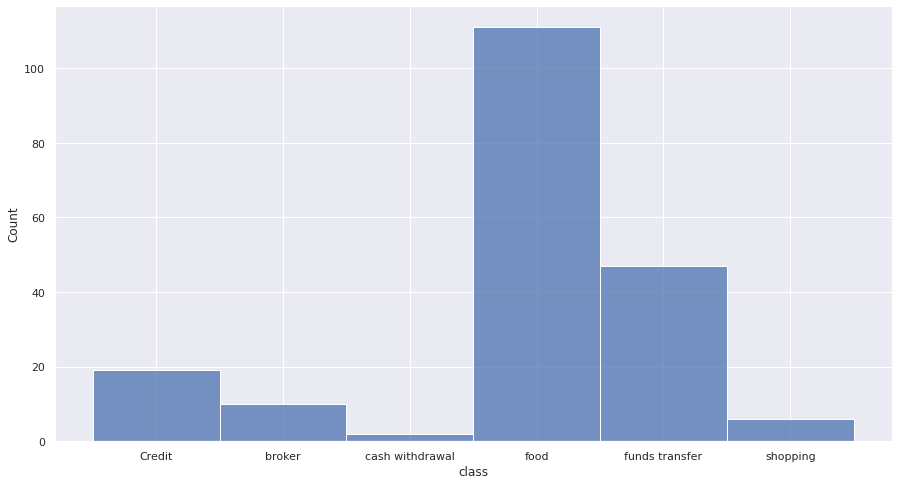

In [25]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(df['class'],bins='auto')

The plot shows the category and the count of UPI transaction.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Transaction Summary'],df['category'], stratify=df['category'])
print(y_train.head(4))
print(X_train.head(4))

64     3
79     3
77     3
152    3
Name: category, dtype: int8
64     upi-zomato-zomato-order@paytm-pytm0123456-1116...
79     upi-zomato-zomato-order@paytm-pytm0123456-1123...
77     upi-razorpayzomato-zomatoindia@icici-icic00000...
152    upi-zomato-zomato-order@paytm-pytm0123456-1152...
Name: Transaction Summary, dtype: object


In [27]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow-text
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [28]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size = 32)

Epoch 1/10
5/5 [==============================] - 112s 15s/step - loss: -1.5070 - accuracy: 0.0548
Epoch 2/10
5/5 [==============================] - 73s 14s/step - loss: -5.4933 - accuracy: 0.0479
Epoch 3/10
5/5 [==============================] - 69s 14s/step - loss: -9.1436 - accuracy: 0.0479
Epoch 4/10
5/5 [==============================] - 69s 14s/step - loss: -12.8213 - accuracy: 0.0479
Epoch 5/10
5/5 [==============================] - 69s 14s/step - loss: -16.4280 - accuracy: 0.0479
Epoch 6/10
5/5 [==============================] - 69s 13s/step - loss: -20.0213 - accuracy: 0.0479
Epoch 7/10
5/5 [==============================] - 70s 14s/step - loss: -23.7391 - accuracy: 0.0479
Epoch 8/10
5/5 [==============================] - 70s 14s/step - loss: -27.2771 - accuracy: 0.0479
Epoch 9/10
5/5 [==============================] - 69s 13s/step - loss: -30.9489 - accuracy: 0.0479
Epoch 10/10
5/5 [==============================] - 70s 14s/step - loss: -34.5270 - accuracy: 0.0479


In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

Accuracy of the bert model was not that satisfying so I tried with other ML models.

Text Classification using Naive Bayes, Linear SVC and Random Forest

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')
# We transform each complaint into a vector
features = tfidf.fit_transform(df['Transaction Summary']).toarray()
labels = df['category']
print("Each of the %d transaction is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]

In [ ]:
# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

In [ ]:
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

Linear SVC has accuracy of 90%.

In [ ]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVCn", size=16);